In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from randomization_proposals import experiment
import matplotlib.markers as markers
import matplotlib.lines as mlines

In [18]:
df = []
MODEL = "log"
for i in tqdm(range(5)):
    df.append(pd.read_csv("../../data/census_results/ca_income_"+MODEL+str(i)+".csv"))
df = pd.concat(df)
df["risk"] = (df["risk"] / 0.05).round(0) * 0.05
df["outlier_pval"] = (df["outlier_pval"] / 0.05).round(0) * 0.05
df = df.reset_index()
df = df.groupby(["risk", "outlier_pval"])["index"].count().reset_index()


density = []
for pval in np.linspace(0, 1, 21):
    inner = []
    for risk in np.linspace(0, 1, 21):
        val = df.loc[(df["risk"]==risk)&(df["outlier_pval"]==pval), "index"].to_numpy()
        if len(val)>0:
            inner.append(np.mean(val))
        else:
            inner.append(0)
    density.append(inner)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 21.96it/s]


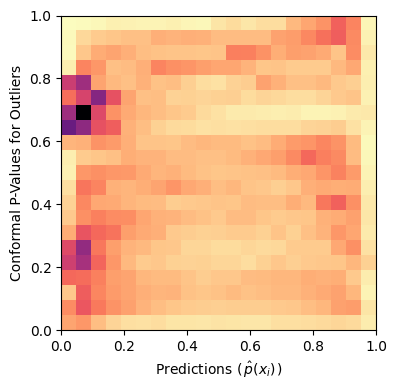

In [19]:
plt.rcParams["figure.figsize"] = [5, 4]
fig, ax = plt.subplots()

plt.imshow(density, cmap='magma_r', interpolation='nearest', extent=(0, 1, 0, 1), origin="lower")

plt.ylabel("Conformal P-Values for Outliers")
plt.xlabel("Predictions ($\\,\\hat{p}(x_i)\\,$)")

ax.set_facecolor('w')
plt.tight_layout()
plt.savefig('census_outliers_'+MODEL+'.jpg', format='jpg', dpi=1000)
plt.show()

In [26]:
df = []
MODEL = "rf"
for i in tqdm(range(5)):
    df.append(pd.read_csv("../../data/census_results/ca_income_"+MODEL+str(i)+".csv"))
df = pd.concat(df)
df["risk"] = (df["risk"] / 0.05).round(0) * 0.05
df["risk_std"] = df[["risk_b0", "risk_b1", "risk_b2", "risk_b3", "risk_b4", "risk_b5", "risk_b6", "risk_b7", "risk_b8", "risk_b9", "risk_b10"]].std(axis=1)
df["risk_std"] = (df["risk_std"] / 0.01).round(0) * 0.01
df = df.reset_index()
df = df.groupby(["risk", "risk_std"])["index"].count().reset_index()

density = []
for std in np.linspace(0, 0.2, 21):
    inner = []
    for risk in np.linspace(0, 1, 21):
        val = df.loc[(df["risk"]==risk)&(df["risk_std"]==std), "index"].to_numpy()
        if len(val)>0:
            inner.append(np.mean(val))
        else:
            inner.append(0)
    density.append(inner)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 22.05it/s]


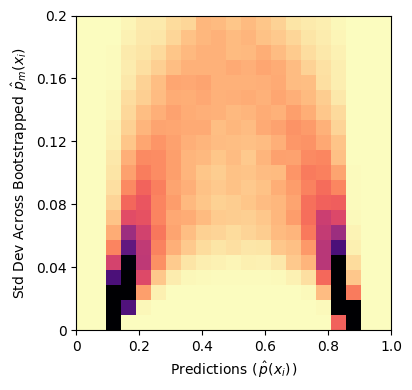

In [29]:
plt.rcParams["figure.figsize"] = [5, 4]
fig, ax = plt.subplots()

plt.imshow(density, cmap='magma_r', interpolation='nearest', vmax=np.median(density)*10, extent=(0, 1, 0, 1), origin="lower")

plt.ylabel("Std Dev Across Bootstrapped $\\,\\hat{p}_{m}(x_i)\\,$")
plt.xlabel("Predictions ($\\,\\hat{p}(x_i)\\,$)")

ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0, 0.04, 0.08, 0.12, 0.16, 0.20])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_facecolor('w')
plt.tight_layout()
plt.savefig('census_variance_'+MODEL+'.jpg', format='jpg', dpi=1000)
plt.show()